# Distribución Gaussiana multivariada

## Distancia de Mahalanobis

La densidad Gaussiana multivariada puede reescribirse como:
$$p(\boldsymbol{y}\mid\boldsymbol{\mu},\mathbf{\Sigma})=%
\frac{1}{(2\pi)^{D/2}\lvert\mathbf{\Sigma}\rvert^{1/2}}%
\exp\left[-\frac{1}{2}\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})\right]$$
donde $\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})$ es el cuadrado de la **distancia de Mahalanobis** entre $\boldsymbol{y}$ y $\boldsymbol{\mu}$ con respecto a $\mathbf{\Sigma}^{-1}$,
$$\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})%
=(\boldsymbol{y}-\boldsymbol{\mu})^t\mathbf{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu})$$
Si $\mathbf{\Sigma}$ es definida positiva, su inversa también lo es y puede descomponerse como 
$\mathbf{\Sigma}^{-1}=\mathbf{W}\mathbf{W}^t$, $\mathbf{W}$ matriz cuadrada real, por lo que:
$$\Delta^2(\boldsymbol{y},\boldsymbol{\mu};\mathbf{\Sigma}^{-1})%
=(\boldsymbol{y}-\boldsymbol{\mu})^t\mathbf{W}\mathbf{W}^t(\boldsymbol{y}-\boldsymbol{\mu})%
=(\mathbf{W}^t(\boldsymbol{y}-\boldsymbol{\mu}))^t\mathbf{W}^t(\boldsymbol{y}-\boldsymbol{\mu})%
=\lVert\boldsymbol{z}\rVert_2^2%
\quad\text{con}\quad%
\boldsymbol{z}=\mathbf{W}^t(\boldsymbol{y}-\boldsymbol{\mu})$$
Esto es, la distancia de Mahalanobis se reduce a la distancia Euclídea tras aplicar una afinidad.
El cálculo de $\mathbf{W}$ puede hacerse a partir de la descomposición propia de $\mathbf{\Sigma}$ en función de $\mathbf{U}=(\boldsymbol{u}_1,\dotsc,\boldsymbol{u}_D)$, matriz ortogonal cuyas columnas son vectores propios normalizados de $\mathbf{\Sigma}$, y $\mathbf{\Lambda}=\operatorname{diag}(\lambda_1,\dotsc,\lambda_D)$, matriz diagonal con los valores propios asociados,
$$\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t
=\sum_{d=1}^D\lambda_d\boldsymbol{u}_d\boldsymbol{u}_d^t$$
por lo que
$$\mathbf{\Sigma}^{-1}=\mathbf{U}\boldsymbol{\Lambda}^{-1}\mathbf{U}^t
%=\sum_{d=1}^D\frac{1}{\lambda_d}\boldsymbol{u}_d\boldsymbol{u}_d^t\;
=\mathbf{W}\mathbf{W}^t
\quad\text{con}\quad%
\mathbf{W}=\mathbf{U}\boldsymbol{\Lambda}^{-1/2}
\quad\text{y}\quad%
\mathbf{W}^t=\boldsymbol{\Lambda}^{-1/2}\mathbf{U}^t$$
La afinidad $\boldsymbol{y}\mapsto\boldsymbol{z}$ es invertible ya que $\mathbf{W}^t$ es invertible, 
$\mathbf{W}^{-t}=\mathbf{U}\mathbf{\Lambda}^{1/2}$, por lo que $\boldsymbol{z}\mapsto\boldsymbol{y}$ es
$$\boldsymbol{y}=\boldsymbol{\mu}+\mathbf{U}\mathbf{\Lambda}^{1/2}\boldsymbol{z}%
=\boldsymbol{\mu}+\sum_{d=1}^D z_d\sqrt{\lambda_d}\boldsymbol{u}_d$$
Tomando $\boldsymbol{z}$ en la hiperesfera de radio $r$, $\boldsymbol{y}$ dibuja un hiperelipsoide de centro $\boldsymbol{\mu}$ y semiejes $\{\boldsymbol{u}_d\}$ de longitudes $\{r\sqrt{\lambda_d}\}$.

**Ejemplo:**

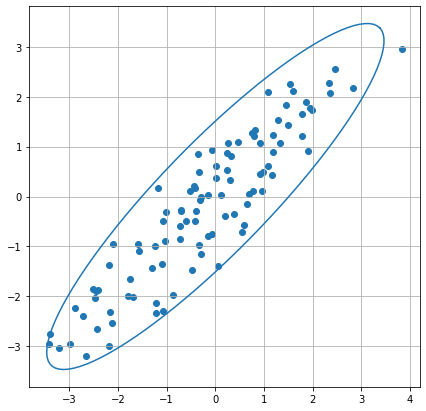

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# S = np.array([[1., .0], [.0, 1.]])
# S = np.array([[1., .0], [.0, 3.]])
S = np.array([[2., 1.8], [1.8, 2.]])
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
r = 2.45
t = np.linspace(0, 2*np.pi, 100)
x, y = U @ np.diag(r*np.sqrt(La)) @ np.array([np.cos(t), np.sin(t)])
Y = np.vstack((x, y)).T
cov = U @ np.diag(La) @ U.T
fig, ax = plt.subplots(figsize=(7, 7))
ax.grid()
plt.plot(Y[:, 0], Y[:, 1])
X = multivariate_normal(cov=cov).rvs(100)
ax.scatter(X[:,0], X[:,1]);